<a href="https://colab.research.google.com/github/haugaard1101/12DaysOfChristmas/blob/master/Mandatory1customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score
from pickle import dump,load

In [ ]:
!rm -r machine-learning
!git clone https://github.com/joneikholmkea/machine-learning

rm: cannot remove 'machine-learning': No such file or directory
Cloning into 'machine-learning'...
remote: Enumerating objects: 80873, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 80873 (delta 49), reused 80 (delta 30), pack-reused 80740
Receiving objects: 100% (80873/80873), 303.35 MiB | 33.05 MiB/s, done.
Resolving deltas: 100% (58990/58990), done.
Updating files: 100% (94954/94954), done.


In [ ]:
dataFrame = pd.read_csv("machine-learning/csv/customer_staying_or_not.csv")

In [ ]:
dataFrame.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,NaN,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataFrame.isnull().sum()

RowNumber          0
CustomerId         0
Surname            1
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
dataFrame.dropna(inplace=True)

In [ ]:
dataFrame.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [ ]:
x = dataFrame.iloc[ : , 3:13 ]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y = dataFrame.iloc[ : , -1 ]
y

0       1
2       1
3       0
4       0
5       1
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9999, dtype: int64

In [ ]:
x = pd.get_dummies(x)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [ ]:
columnNames = list(x.columns)

In [ ]:
columnNames

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male']

In [ ]:
x = x.values

In [ ]:
y = y.values

In [ ]:
y

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x[0]

array([-0.32625228,  0.29352314, -1.04194667, -1.22577549, -0.91166696,
        0.64598197,  0.97033674,  0.02190711,  0.9971039 , -0.57877454,
       -0.57369331,  1.09610816, -1.09610816])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x , y , test_size = 0.2, random_state = 42)

In [ ]:
x_train[0:5]

array([[ 0.36695375, -0.65996696,  0.34122897, -1.22577549,  0.80763857,
         0.64598197,  0.97033674,  1.37373976,  0.9971039 , -0.57877454,
        -0.57369331, -0.91231872,  0.91231872],
       [ 0.44972462, -0.75531597,  0.34122897,  0.52193605,  0.80763857,
         0.64598197,  0.97033674, -1.40218332, -1.00290451,  1.7277885 ,
        -0.57369331, -0.91231872,  0.91231872],
       [-0.58491124,  0.19817413, -1.04194667,  0.73818013,  0.80763857,
         0.64598197,  0.97033674, -1.00918785, -1.00290451,  1.7277885 ,
        -0.57369331, -0.91231872,  0.91231872],
       [-0.92634107, -1.13671201,  1.3786107 ,  0.94798627, -0.91166696,
         0.64598197, -1.03057006,  0.92142368,  0.9971039 , -0.57877454,
        -0.57369331,  1.09610816, -1.09610816],
       [ 0.50145641,  0.38887215, -1.04194667,  0.96162243,  0.80763857,
         0.64598197, -1.03057006, -0.30034702, -1.00290451, -0.57877454,
         1.7430916 , -0.91231872,  0.91231872]])

In [ ]:
mylist = [1, 2, 3]
a, b, c = mylist
print(a)
print(b)
print(c)

1
2
3


In [ ]:
model = Sequential()
model.add(Dense(4,activation='relu')) # 4 outputs. It will automatically adapt to number inputs
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # Final output node for prediction. In this case, only one output neuron

adam = Adam(learning_rate=0.001) # you may have to change learning_rate, if the model does not learn.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
# use loss = 'binary_crossentropy' for two-class classification.
# use loss = 'categorical_crossentropy' for multi-class classification.
# use loss = 'mse' (Mean Square Error) for regression (e.g. the Age,Height exercise).
# For classification only: use metrics = ['accuracy']. It shows successful predictions / total predictions



In [ ]:
model.fit(x_train,y_train,epochs=100, verbose=1)  # does the actual WORK !. verbose=1 will show output. 0 = no output.

Epoch 1/100
250/250 [==============================] - 3s 3ms/step - loss: 0.5788 - accuracy: 0.7943
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4920 - accuracy: 0.7943
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4670 - accuracy: 0.7943
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4416 - accuracy: 0.7943
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4296 - accuracy: 0.7943
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4225 - accuracy: 0.7943
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4170 - accuracy: 0.7943
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4113 - accuracy: 0.7943
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4050 - accuracy: 0.7943
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3987 - accura

In [ ]:
model.save('predictCus.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Axes: >

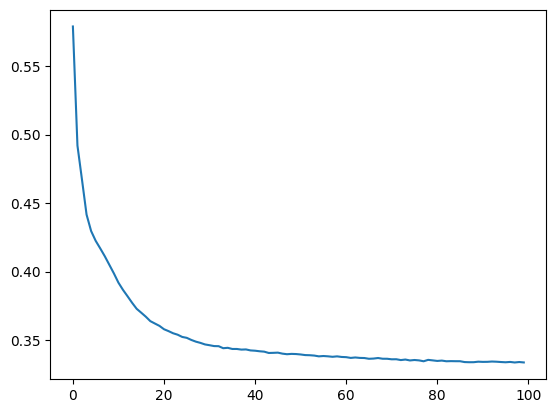

In [ ]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)



In [ ]:
model.evaluate(x_test,y_test,verbose=1)

63/63 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8545


[0.35774630308151245, 0.8544999957084656]

In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5) # creates a new array with true/false based on the boolean test

cm = confusion_matrix(y_test, y_pred)
print(cm)

# will return a 2D array like this (similar numbers):
# [[1544   63]
 # [ 218  175]]

# interpretation:
# Top-left: 1544 correct predictions of 0.
# Top-right: 63 incorrect predictions of 1, when the y_test was 0.
# Bottom-left: 218 incorrect predictions of 0, when the y_test was 1.
# Bottom-right: 175 correct predictions of 1



63/63 [==============================] - 0s 1ms/step
[[1532   76]
 [ 215  177]]


In [ ]:
print(columnNames) # first print column names, so you can enter new data in the correct columns
new_value = [[600,40,3,60000,2,1,1,50000,1,0,0,0,1]] # enter new data in 2D array. Only numbers + dummy variables.
                                                                                                                                    # TODO, JON: tool to getDummies() for new predictions
new_value = scaler.transform(new_value) # Don't forget to scale!
model.predict(new_value)



['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']
1/1 [==============================] - 0s 27ms/step


array([[0.03193]], dtype=float32)